In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC,SVR,SVC,LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
zoomed = np.array(range(1,101))

Using TensorFlow backend.


In [4]:
Bank-
no of transaction-y
bamk balance -x1
age-x2
retirement status-x3


y=a1*x1+a2*x2+a3*x3+b

SyntaxError: invalid syntax (<ipython-input-4-f746135b0166>, line 1)

In [3]:
def relu(x):
    return max(0,x)

In [4]:
relu(10)

10

In [5]:
relu(-5)

0

In [10]:
def new_value(old_value,slope,lr=0.002):
    return old_value-lr*slope

In [11]:
new_value(2,18)

1.964

In [3]:
import keras

In [4]:
digits=datasets.load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
x=digits.data

In [8]:
x.shape

(1797, 64)

In [9]:
y=digits.target

In [10]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
y.shape

(1797,)

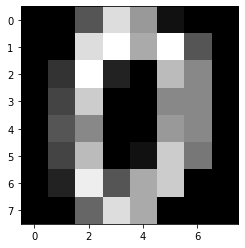

In [22]:
plt.imshow(x[0].reshape(8,8),cmap='gray')
plt.show()

In [23]:
y[0]

0

In [11]:
def showRandomImage():
    index = np.random.randint(x.shape[0])
    plt.imshow(x[index].reshape(8,8),cmap='gray')
    plt.show()
    print(y[index])

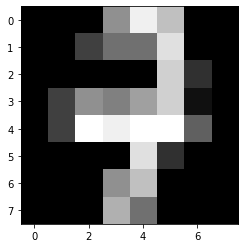

7


In [14]:
showRandomImage()

In [13]:
digits['images'].shape

(1797, 8, 8)

In [9]:
model = Sequential()

model.add(Dense(100,activation='relu',input_shape=(64,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [10]:
y_cat=to_categorical(y)

In [36]:
y_cat.shape

(1797, 10)

In [37]:
y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
model.fit(x,y_cat,epochs=20,validation_split=0.3)

W0822 22:02:46.211424 13476 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 22:02:46.310192 13476 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1257 samples, validate on 540 samples
Epoch 1/20
1257/1257 [==============================] - 1s 778us/step - loss: 1.0723 - acc: 0.6698 - val_loss: 0.4333 - val_acc: 0.8648
Epoch 2/20
1257/1257 [==============================] - 0s 85us/step - loss: 0.1860 - acc: 0.9427 - val_loss: 0.2735 - val_acc: 0.9241
Epoch 3/20
1257/1257 [==============================] - 0s 93us/step - loss: 0.1086 - acc: 0.9706 - val_loss: 0.3142 - val_acc: 0.9056
Epoch 4/20
1257/1257 [==============================] - 0s 164us/step - loss: 0.0662 - acc: 0.9825 - val_loss: 0.2393 - val_acc: 0.9407
Epoch 5/20
1257/1257 [==============================] - 0s 163us/step - loss: 0.0430 - acc: 0.9936 - val_loss: 0.2259 - val_acc: 0.9444
Epoch 6/20
1257/1257 [==============================] - 0s 165us/step - loss: 0.0333 - acc: 0.9944 - val_loss: 0.2161 - val_acc: 0.9463
Epoch 7/20
1257/1257 [==============================] - 0s 161us/step - loss: 0.0227 - acc: 0.9992 - val_loss: 0.2228 - val_acc: 0.9426
Epo

In [34]:
diabetes=datasets.load_diabetes()

In [54]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [35]:
x,y=diabetes.data,diabetes.target

In [36]:
x.shape

(442, 10)

In [37]:
model = Sequential()

model.add(Dense(100,activation='relu',input_shape=(10,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
model.fit(x,y,validation_split=0.3,shuffle=True,epochs=1000,callbacks=[EarlyStopping(patience=10)])

Train on 309 samples, validate on 133 samples
Epoch 1/1000
309/309 [==============================] - 1s 3ms/step - loss: 28370.4647 - val_loss: 30613.3370
Epoch 2/1000
309/309 [==============================] - 0s 140us/step - loss: 28304.7975 - val_loss: 30517.6391
Epoch 3/1000
309/309 [==============================] - 0s 116us/step - loss: 28186.3154 - val_loss: 30343.4642
Epoch 4/1000
309/309 [==============================] - 0s 109us/step - loss: 27979.9284 - val_loss: 30043.0045
Epoch 5/1000
309/309 [==============================] - 0s 95us/step - loss: 27636.2448 - val_loss: 29559.1473
Epoch 6/1000
309/309 [==============================] - 0s 103us/step - loss: 27096.1545 - val_loss: 28829.4698
Epoch 7/1000
309/309 [==============================] - 0s 118us/step - loss: 26296.6578 - val_loss: 27777.6762
Epoch 8/1000
309/309 [==============================] - 0s 116us/step - loss: 25188.1076 - val_loss: 26344.6908
Epoch 9/1000
309/309 [==============================] - 0s 11

In [133]:
mean_squared_error(y,[np.mean(y)]*len(y))

5929.884896910383

In [147]:
1-2735/5929

0.5387080452015517

In [13]:
digits=datasets.load_digits()

In [14]:
x=digits.data
y=digits.target

In [15]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [16]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [17]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [18]:
y_cat=to_categorical(y)

In [19]:
y_cat.shape

(1797, 10)

In [21]:
model = Sequential()

model.add(Dense(40,activation='relu',input_shape=(64,)))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x,y_cat,validation_split=0.3,shuffle=True,epochs=1000,callbacks=[EarlyStopping(patience=10)])

Train on 1257 samples, validate on 540 samples
Epoch 1/1000
1257/1257 [==============================] - 1s 404us/step - loss: 6.1299 - acc: 0.1822 - val_loss: 3.9679 - val_acc: 0.3111
Epoch 2/1000
1257/1257 [==============================] - 0s 76us/step - loss: 2.1666 - acc: 0.5068 - val_loss: 1.7090 - val_acc: 0.5630
Epoch 3/1000
1257/1257 [==============================] - 0s 75us/step - loss: 0.7801 - acc: 0.7279 - val_loss: 1.1793 - val_acc: 0.7019
Epoch 4/1000
1257/1257 [==============================] - 0s 81us/step - loss: 0.4531 - acc: 0.8560 - val_loss: 0.9813 - val_acc: 0.7611
Epoch 5/1000
1257/1257 [==============================] - 0s 80us/step - loss: 0.3096 - acc: 0.8958 - val_loss: 0.8973 - val_acc: 0.7852
Epoch 6/1000
1257/1257 [==============================] - 0s 75us/step - loss: 0.2346 - acc: 0.9300 - val_loss: 0.8104 - val_acc: 0.8074
Epoch 7/1000
1257/1257 [==============================] - 0s 120us/step - loss: 0.1870 - acc: 0.9499 - val_loss: 0.7681 - val_acc:

Epoch 60/1000
1257/1257 [==============================] - 0s 141us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.4322 - val_acc: 0.9056
Epoch 61/1000
1257/1257 [==============================] - 0s 142us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.4332 - val_acc: 0.9111
Epoch 62/1000
1257/1257 [==============================] - 0s 145us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4335 - val_acc: 0.9074
Epoch 63/1000
1257/1257 [==============================] - 0s 141us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.4347 - val_acc: 0.9111
Epoch 64/1000
1257/1257 [==============================] - 0s 142us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.4337 - val_acc: 0.9093


In [49]:
5 neuron 1 layer - 0.5939
5 neuron 2 layer - 0.6710
10 neuron 1 layer -0.4402
20 neuron 1 layer - 0.3258
40 neuron 1 layer - 0.3107

0- 0.7  0.6
1- 0.3   0.4



SyntaxError: invalid syntax (<ipython-input-49-d12225c9b9bf>, line 1)

In [50]:
64 columns

100 neuron - 1 layer - 6400 weights +100*1 bias =6500
100 neuron - 2 layer - 10000 wights +100*1 bias = 10100
10 neuron - 3 layer - 1000 wights + 10*1 bias = 1010

1760 values trained

SyntaxError: invalid syntax (<ipython-input-50-99983191209b>, line 1)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 17,610
Trainable params: 17,610
Non-trainable params: 0
_________________________________________________________________
